In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tf.__version__

'1.10.0'

In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

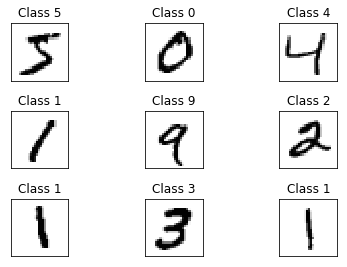

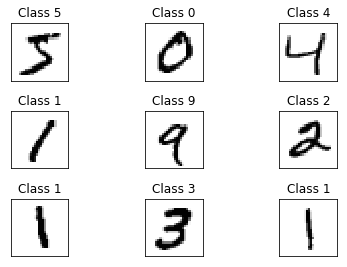

In [6]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='binary', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig
    

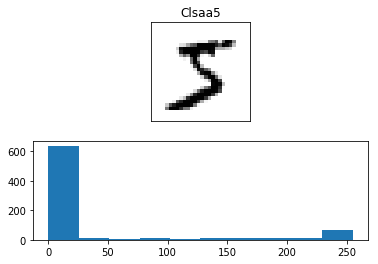

In [7]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0],cmap='binary')
plt.title("Clsaa{}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))
plt.show()

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255



(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [9]:
# 有幾類
n_classes = 10
# 轉 one-hot
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.3))

model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [13]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [14]:
history = model.fit(
    x_train, y_train, 
    batch_size=128, epochs=8, verbose=2, 
    validation_data=(x_test,y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
 - 22s - loss: 0.3420 - acc: 0.8969 - val_loss: 0.1415 - val_acc: 0.9559
Epoch 2/8
 - 23s - loss: 0.1474 - acc: 0.9558 - val_loss: 0.0908 - val_acc: 0.9708
Epoch 3/8
 - 24s - loss: 0.1107 - acc: 0.9664 - val_loss: 0.0838 - val_acc: 0.9739
Epoch 4/8
 - 23s - loss: 0.0918 - acc: 0.9716 - val_loss: 0.0768 - val_acc: 0.9766
Epoch 5/8
 - 23s - loss: 0.0770 - acc: 0.9760 - val_loss: 0.0662 - val_acc: 0.9788
Epoch 6/8
 - 23s - loss: 0.0683 - acc: 0.9781 - val_loss: 0.0626 - val_acc: 0.9813
Epoch 7/8
 - 23s - loss: 0.0603 - acc: 0.9813 - val_loss: 0.0648 - val_acc: 0.9805
Epoch 8/8
 - 23s - loss: 0.0542 - acc: 0.9826 - val_loss: 0.0597 - val_acc: 0.9828


In [15]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [16]:
loss_and_metrics = model.evaluate(x_test, y_test, verbose = 2 )
print("Test loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test loss 0.059729204334906534
Test Accuracy 0.9828
